In [4]:
from matplotlib import pyplot as plt
import pandas as pd
from utils import *

## Read data

In [6]:
filename = "results/peft_fingpt-forecaster-crypto-20230125-20240125-1-4-065.csv"
df = pd.read_csv(filename)

In [7]:
df['symbol'].unique()

array(['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'STETH-USD',
       'ADA-USD', 'AVAX-USD', 'DOGE-USD', 'TRX-USD', 'WTRX-USD',
       'DOT-USD', 'LINK-USD', 'MATIC-USD', 'TON11419-USD', 'ICP-USD',
       'LTC-USD', 'BCH-USD', 'LEO-USD', 'ATOM-USD', 'UNI7083-USD',
       'ETC-USD', 'XLM-USD', 'OKB-USD', 'APT21794-USD'], dtype=object)

## Parse and update DF

In [8]:
gt_parsed = [parse_answer(answer) for answer in df['answer']]
gt_margins, gt_bins = [], []
for label in df['label']:
    gt_margin, gt_bin = from_bin_to_margin(label)
    gt_margins.append(gt_margin)
    gt_bins.append(gt_bin)
gt_margins = np.array(gt_margins)
gt_bins = np.array(gt_bins)
df['gt_margin'] = gt_margins
df['gt_bin'] = gt_bins

In [9]:
pred_parsed = [parse_answer(answer) for answer in df['generated']]
pred_margins = [answer['prediction'] if answer else 0 for answer in pred_parsed]
pred_bins = [answer['prediction_binary'] if answer else 0 for answer in pred_parsed]
pred_margins = np.array(pred_margins)
pred_bins = np.array(pred_bins)
df['pred_margin'] = pred_margins
df['pred_bin'] = pred_bins

## General

In [10]:
calc_metrics(df['generated'], df['answer'])

{'valid_count': 444,
 'bin_acc': 0.4617117117117117,
 'mse': 30.867117117117118,
 'rmse': 5.555818312104628,
 'mae': 4.686936936936937,
 'pros_rouge_scores': {'rouge1': 0.4108177333597246,
  'rouge2': 0.1157819120655979,
  'rougeL': 0.23670255660144143},
 'cons_rouge_scores': {'rouge1': 0.3773881543036742,
  'rouge2': 0.09787644438153528,
  'rougeL': 0.22917853349765568},
 'anal_rouge_scores': {'rouge1': 0.40709133320271085,
  'rouge2': 0.09760523565475453,
  'rougeL': 0.21236534974351476}}

In [11]:
correlation_coeff = np.corrcoef(gt_margins, pred_margins)[0, 1]
print(f'Correlation Coefficient: {correlation_coeff}')

mse = np.mean((gt_margins - pred_margins) ** 2)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

mae = np.mean(np.abs(gt_margins - pred_margins))
print(f'MAE: {mae}')

Correlation Coefficient: -0.07036501653177565
MSE: 30.88111111111111
RMSE: 5.557077569290455
MAE: 4.697777777777778


## Specific symbol

In [12]:
symbol = 'BTC-USD'
df_stock = df[df['symbol'] == symbol]

In [13]:
calc_metrics(df_stock['generated'], df_stock['answer'])

{'valid_count': 18,
 'bin_acc': 0.5,
 'mse': 29.833333333333332,
 'rmse': 5.461989869391313,
 'mae': 4.388888888888889,
 'pros_rouge_scores': {'rouge1': 0.412170427395026,
  'rouge2': 0.11355523050875822,
  'rougeL': 0.22869321820033128},
 'cons_rouge_scores': {'rouge1': 0.3867823919415855,
  'rouge2': 0.10943599321913842,
  'rougeL': 0.22599446525222355},
 'anal_rouge_scores': {'rouge1': 0.41434085693174993,
  'rouge2': 0.10900077962993751,
  'rougeL': 0.21457230073248582}}

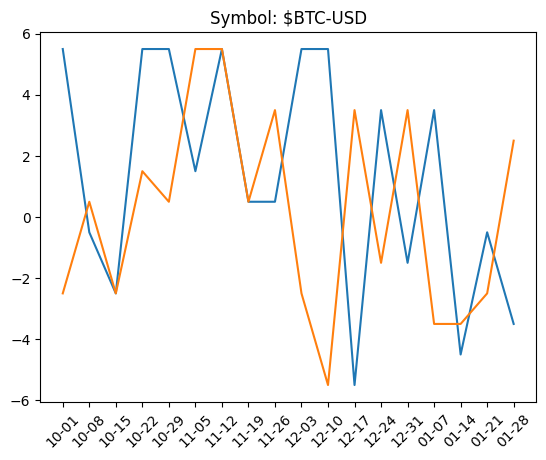

In [14]:
plt.plot(df_stock['period'].apply(lambda x: x[-5:]), df_stock['gt_margin'])
plt.plot(df_stock['period'].apply(lambda x: x[-5:]), df_stock['pred_margin'])
plt.title(f'Symbol: ${symbol}')
plt.xticks(rotation=45)
plt.show()

In [15]:
print(df_stock.iloc[0]['generated'])

[Positive Developments]:
1. Bitcoin has shown resilience in the face of market volatility, with a stable price around $26,500.
2. The potential for a spot Bitcoin ETF approval has been a recurring theme in recent weeks, with the SEC still to make a final decision.
3. Bitcoin has seen a significant increase in adoption in El Salvador, with the country's central bank announcing plans to accept it as a legal tender.
4. The crypto community has been optimistic about the potential for a Bitcoin price recovery, with some analysts predicting a significant increase in value.

[Potential Concerns]:
1. The ongoing bearish trend in the crypto market, with Bitcoin's price declining over the past week.
2. The uncertainty surrounding the SEC's decision on the Bitcoin ETF, which could lead to a delay or rejection of the approval.
3. The potential for a market correction due to the recent increase in stablecoin liquidity, which could lead to a decrease in Bitcoin's value.
4. The ongoing legal battles 